# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Brian\Anaconda2\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


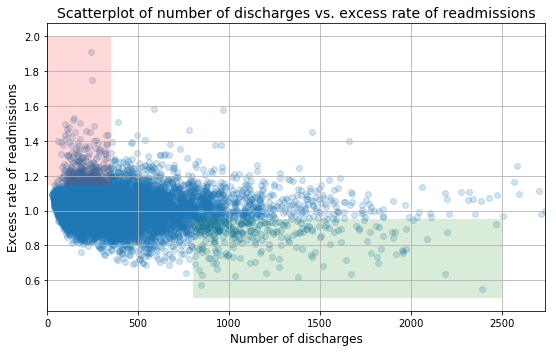

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

A) The analysis says "Overall, rate of readmissions is trending down with increasing number of discharges", but is it really?  The scatterplot doesn't look that conclusive to me.  I ran a linear regression to see.

In [10]:
from scipy import stats

In [11]:
stats.linregress(x,y)

LinregressResult(slope=-2.8565052943822634e-05, intercept=1.0179475579544219, rvalue=-0.093095542875904408, pvalue=1.5022756426615089e-23, stderr=2.8498248278499889e-06)

an R of -0.093 is barely any relationship. What difference does exist (a mean readmission rate of 1.023 vs .978) doesn't appear to be of sufficient magnitude to justify a policy change.

The data also doesn't give any specific support for the regulatory policy recommendations.  The correlation (which, it bears repeating, is miniscule) does not imply that the size of the hospital is the determining factor for readmission rate.  Larger hospitals might take on a different type of patient load, for example, where they can treat more low risk patients that would not be likely to have to readmit, whereas a small hospital might leave the low risk patients to clinics and family practitioners, instead focusing on more serious cases with their limited resouces, causing a higher readmittance rate.  Consolidating these into larger facilities would do little to affect patient care other than making the patient travel farther.

##### 1. Setup an appropriate hypothesis test.

    The above statistics section makes a comparison between the readmission ratio for hospitals with fewer than 100 discharges and hospitals with greater than 1000, so lets set up a two sample t test for those two groups
    
    Null Hypothesis:  There is no difference between the mean readmission ratio for the two groups.
    Alternate Hypothesis:  The mean for small hospitals is greater than that of large hospitals

In [23]:
df = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].notnull()]
errsmall = df[df['Number of Discharges'] < 100]['Excess Readmission Ratio']
errlarge = df[df['Number of Discharges'] > 1000]['Excess Readmission Ratio']

In [52]:
s = (len(errsmall -1)*np.square(errsmall.std())+len(errlarge -1)*np.square(errlarge.std()))/(len(errsmall) + len(errlarge) - 2)

0.0064654342282486439

In [60]:
t = (errlarge.mean() - errsmall.mean())/(np.sqrt(s*(1./len(errsmall) + 1./len(errlarge))))
t

-10.052235830999491

In [61]:
stats.t.cdf(t, len(errsmall) + len(errlarge) -2)

2.047180349322445e-23

With a p-value of 2.05e-23, we reject the null hypothesis and conclude that there is a statistically significant evidence that the mean readmission ration for large hospitals is smaller than that of small hospitals.

In this circumstance, though, we should examine the effect size with Cohen's d before making any decisions based off that finding.

In [62]:
cds = np.sqrt((np.square(errsmall.std()) + np.square(errsmall.std()))/2)

In [64]:
cohend = (errlarge.mean() - errsmall.mean())/cds
cohend

-0.76378054198922463

A cohen's D of -.76 means there's roughly 70% overlap between the two groups.  That's not a large practical difference.  The sample size was large enough that a statistical test can differentiate between the two groups, but a lay observer might not.  This means hospital size might not be the most productive area to focus on for the goal of reducing readmission rate and improving patient care.

A boxplot or violin plot can illustrate these similarities more clearly.



In [80]:
import seaborn as sns

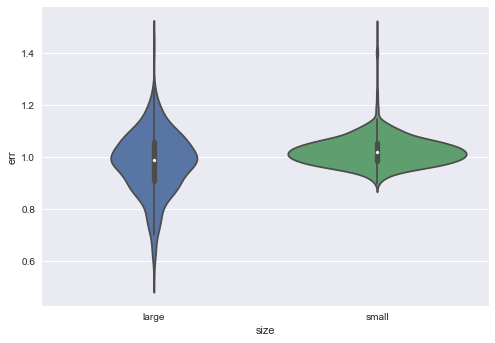

In [86]:
dfl = pd.DataFrame({'err': errlarge, 'size': 'large'})
dfs = pd.DataFrame({'err': errsmall, 'size': 'small'})
box = dfl.append(dfs)
sns.violinplot(data = box, x = 'size', y = 'err')

This paints a picture of small hospitals as being clustered more tightly around 1.0, with larger hospitals having a not-insignificant amount of their excess readmissions ratios up above the median for the small hospitals.